In [38]:
import matplotlib.pyplot as plt  # to plot graphs
import pandas as pd
import numpy as np               # for numerical calculations
from sklearn.utils import shuffle   # to shuffle data
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans  # to import decision tree function
from sklearn.metrics import accuracy_score       # to import accuracy function
from scipy.cluster.vq import vq
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import matplotlib.pylab as plt
#from sklearn.cross_validation import train_test_split #deprecated module, updated module used below
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [39]:
wine_data = pd.read_csv('C:/Users/kisha/Documents/Intelligent_Data_Analysis/Assignment_4/winequality-white.csv', sep = ';')
wine_data.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [40]:
# Let's proceed to separate 'quality' as the target variable and the rest as features.
y = wine_data.quality                  # set 'quality' as target
X = wine_data.drop('quality', axis=1)  # rest are features
print(y.shape, X.shape)           # check correctness

(4898,) (4898, 11)


In [41]:
list(wine_data)

['fixedacidity',
 'volatileacidity',
 'citricacid',
 'residualsugar',
 'chlorides',
 'freesulfurdioxide',
 'totalsulfurdioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [42]:
#modelx = sm.ols(formula='quality ~ fixedacidity + volatileacidity + citricacid + residualsugar + chlorides + freesulfurdioxide + totalsulfurdioxide + density + pH + sulphates + alcohol', data=wine_data).fit()

## Do linear regression to learn the single-feature regression models, one model for each of the 11 features. Find the R2 and AIC values for each of these models. Report these values for the models. 

In [43]:
#Split the data into training and testing sets
Features = wine_data[list(wine_data.columns)[:-1]]
Quality = wine_data['quality']
Features_train, Features_test, Quality_train, Quality_test = train_test_split(Features, Quality)

In [44]:
model_list = []

for feature in list(Features):
    fml = "quality ~ "
    fml = fml+feature  
    model_list.append(sm.ols(formula=fml, data=wine_data))

In [45]:
results=[]
for model in model_list:
    results.append(model.fit())

In [46]:
metrics_rsquared = []
metrics_aic = []
for result in results:
    metrics_rsquared.append(result.rsquared)
    metrics_aic.append(result.aic)

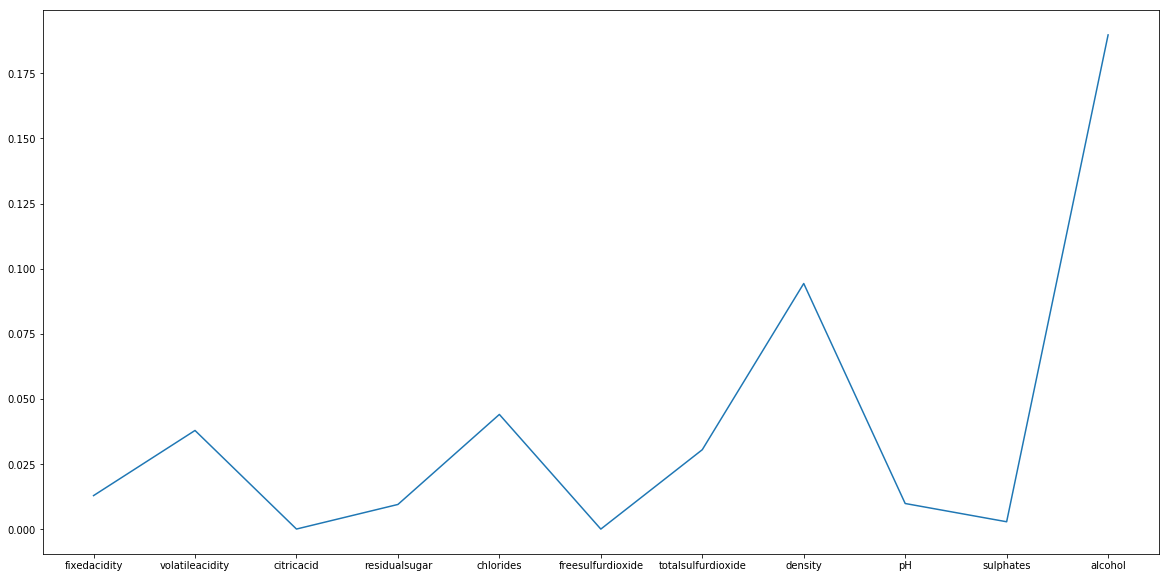

In [47]:
plt.figure(figsize=(20,10))
plt.plot(list(Features),metrics_rsquared)

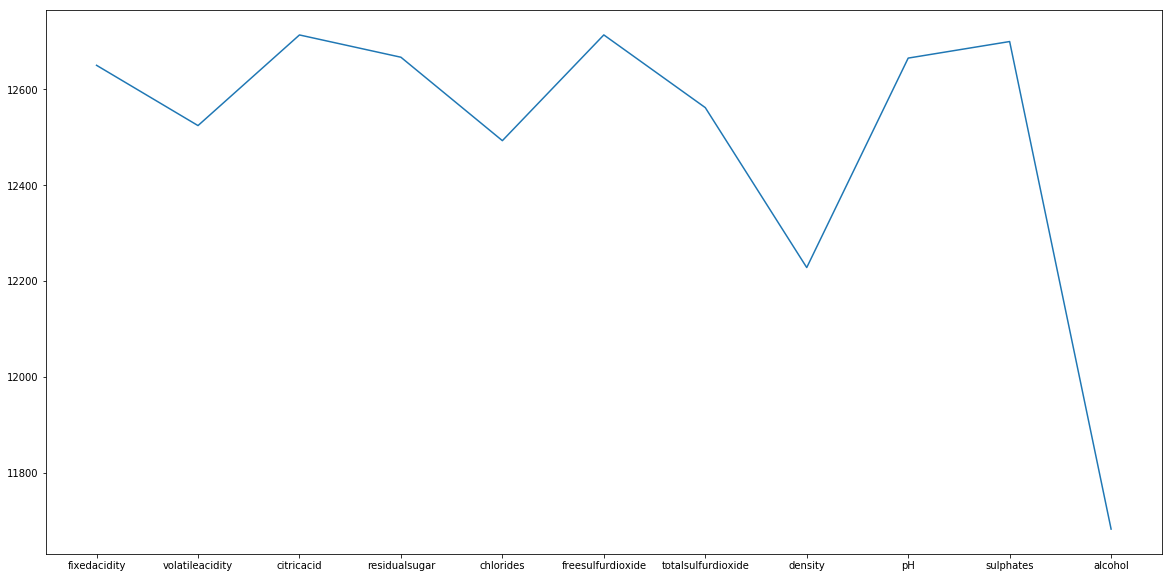

In [48]:
plt.figure(figsize=(20,10))
plt.plot(list(Features),metrics_aic)

# 1.b
#### Select the model with the highest R2 value, combine with its feature other features, one at a time, and thus generate all bivariate regression models (models containing two features). One of these two features is from the selected single-feature model and the other is from one of the remaining 10 features.

In [49]:
#it is observed that alcohol have highest RSquared value. Selecting alcohol feature model
selected_model = model_list[10]

In [50]:
bivariate_model_list = []

bivariate_features = list(Features)[0:10]

for feature in list(bivariate_features):
    fml = "quality ~ alcohol + "
    fml = fml+feature  
    #print(fml)
    bivariate_model_list.append(sm.ols(formula=fml, data=wine_data))

In [51]:
bivariate_results=[]
for model in bivariate_model_list:
    bivariate_results.append(model.fit())

In [52]:
bivariate_metrics_rsquared = []
bivariate_metrics_aic = []
for result in bivariate_results:
    bivariate_metrics_rsquared.append(result.rsquared)
    bivariate_metrics_aic.append(result.aic)

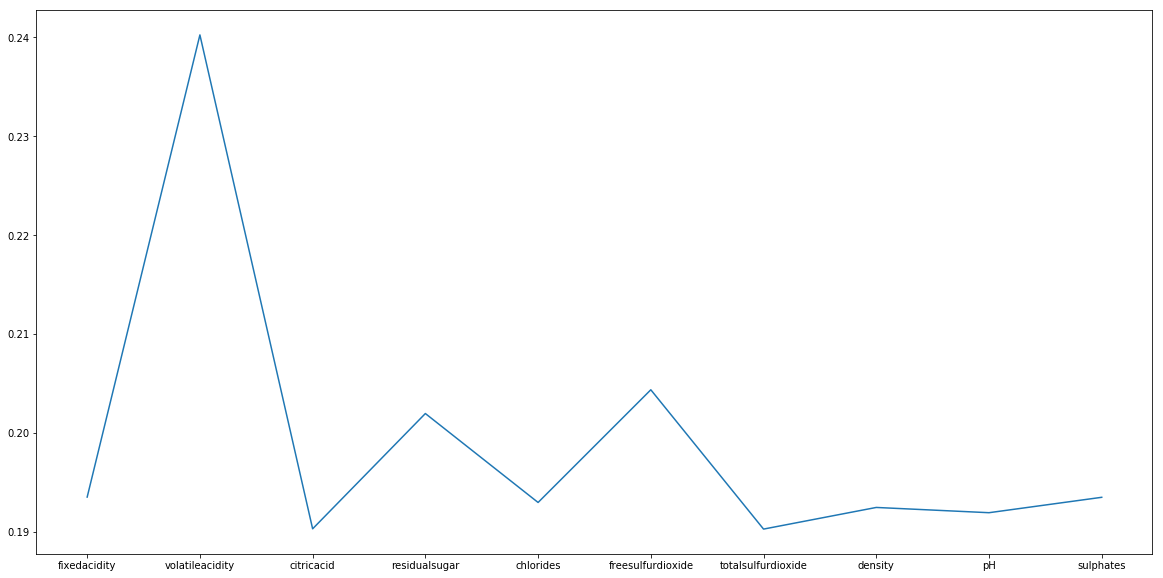

In [53]:
plt.figure(figsize=(20,10))
plt.plot(list(bivariate_features),bivariate_metrics_rsquared)

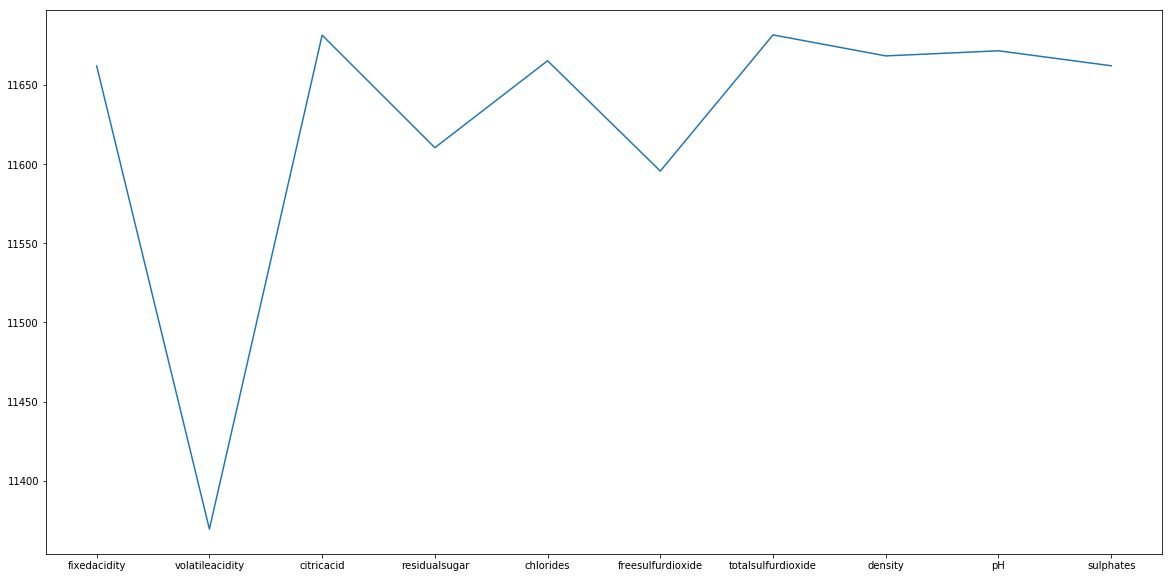

In [54]:
plt.figure(figsize=(20,10))
plt.plot(list(bivariate_features),bivariate_metrics_aic)

# 1.c
### Select the bivariate model with the highest R2 value as the Best model at this stage. Combine a third feature from the remaining nine features with this selected bivariate model to build (and then select the best) 3-feature regression models. Report the R2 and AIC values of all these models. 

In [55]:
#it is observed that alcohol with density have highest RSquared value. Selecting alcohol feature model
selected_bivariate_model = bivariate_model_list[1]

In [56]:
bivariate_features[0:1]+bivariate_features[2:10]

['fixedacidity',
 'citricacid',
 'residualsugar',
 'chlorides',
 'freesulfurdioxide',
 'totalsulfurdioxide',
 'density',
 'pH',
 'sulphates']

In [57]:
multivariate_model_list = []

multivariate_features = bivariate_features[0:1]+bivariate_features[2:10]

for feature in list(multivariate_features):
    fml = "quality ~ alcohol + volatileacidity + "
    fml = fml+feature  
    print(fml)
    multivariate_model_list.append(sm.ols(formula=fml, data=wine_data))

quality ~ alcohol + volatileacidity + fixedacidity
quality ~ alcohol + volatileacidity + citricacid
quality ~ alcohol + volatileacidity + residualsugar
quality ~ alcohol + volatileacidity + chlorides
quality ~ alcohol + volatileacidity + freesulfurdioxide
quality ~ alcohol + volatileacidity + totalsulfurdioxide
quality ~ alcohol + volatileacidity + density
quality ~ alcohol + volatileacidity + pH
quality ~ alcohol + volatileacidity + sulphates


In [58]:
multivariate_results=[]
for model in multivariate_model_list:
    multivariate_results.append(model.fit())

In [59]:
multivariate_metrics_rsquared = []
multivariate_metrics_aic = []
for result in multivariate_results:
    multivariate_metrics_rsquared.append(result.rsquared)
    multivariate_metrics_aic.append(result.aic)

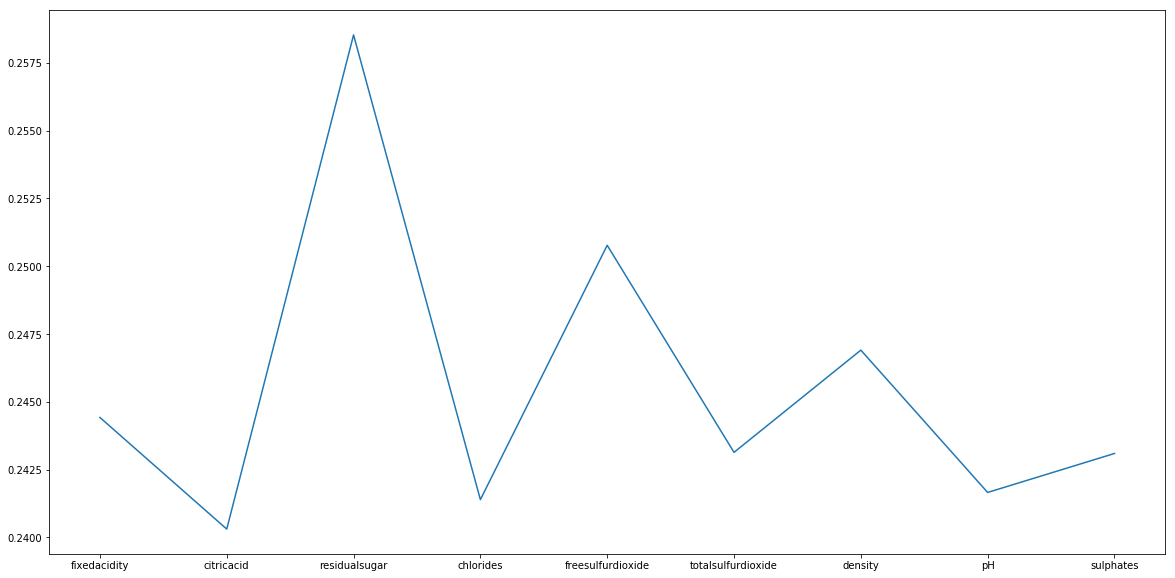

In [60]:
plt.figure(figsize=(20,10))
plt.plot(list(multivariate_features),multivariate_metrics_rsquared)

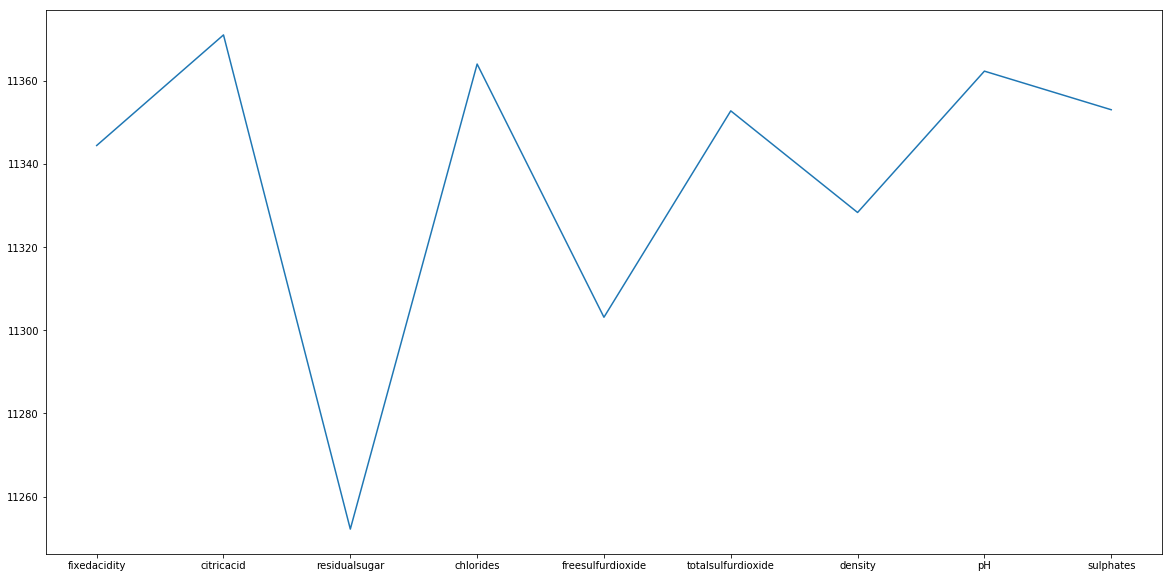

In [61]:
plt.figure(figsize=(20,10))
plt.plot(list(multivariate_features),multivariate_metrics_aic)

### Repeat the steps above to generate (k+1)-feature models from the k-feature models until the following situation arises: all the (k+1)-feature models have an AIC value higher than the AIC value of the k-feature model from which they are being generated. Stop the process and report the k-feature model found as being the best regression model for this data. Report the features included, their coefficients, and p-values for the coefficients. Comment on the magnitudes of the p-values.


In [62]:
import sys
def find_best_model(feature_values):
    best_aic = sys.maxsize
    iter_aic = sys.maxsize-1
    best_features = []
    feature_col = []
    temp_features = feature_values
    iter_feature = ""
    fml = "quality ~ "
    i = 1
    while iter_aic < best_aic:
        
        #print("iteration "+str(i)+" -> "+str(iter_aic))
        if iter_feature != "":
            best_features.append(iter_feature)
            if fml == "quality ~":
                fml = fml + iter_feature
            else:
                fml = fml + " + " + iter_feature
        
        print("fml "+fml)
        print("iteration "+str(i)+" -> iteraic: "+str(iter_aic)+" bestaic:"+str(best_aic))
        
        best_aic = iter_aic
        iter_aic = sys.maxsize
        temp_features = [x for x in feature_values if x not in best_features]
        
        #print("iteration "+str(i)+" -> "+ str(best_features))
        iter_rsquare = 0
        for feature in temp_features:
            #print("iteration "+feature+" -> "+ str(best_features))
            
            feature_col = best_features+[feature]
            if fml != "quality ~ ": 
                fml_iter = fml + " + "+feature
                print(fml)
            else:
                fml_iter = fml + feature
          
            print("fml_iter "+fml_iter)
            #regressor_list.append(regressor.fit(Features_train[feature_col], Quality_train))

            #model = sm.OLS(Quality_train, Features_train[feature_col])
            model = sm.ols(formula=fml_iter, data=wine_data)

            result = model.fit()
            #print("feature "+feature+" -> result aic: "+ str(result.aic)+" iter aic: "+str(iter_aic))
            #if result.aic < iter_aic :
            if result.rsquared > iter_rsquare :
                best_model = model
                best_results = results
                iter_aic = result.aic
                iter_rsquare = result.rsquared
                iter_feature = feature
        i=i+1
    
    return best_features,best_model

In [63]:
rs,best_model = find_best_model(list(Features)[0:11])

fml quality ~ 
iteration 1 -> iteraic: 9223372036854775806 bestaic:9223372036854775807
fml_iter quality ~ fixedacidity
fml_iter quality ~ volatileacidity
fml_iter quality ~ citricacid
fml_iter quality ~ residualsugar
fml_iter quality ~ chlorides
fml_iter quality ~ freesulfurdioxide
fml_iter quality ~ totalsulfurdioxide
fml_iter quality ~ density
fml_iter quality ~ pH
fml_iter quality ~ sulphates
fml_iter quality ~ alcohol
fml quality ~  + alcohol
iteration 2 -> iteraic: 11682.782413524452 bestaic:9223372036854775806
quality ~  + alcohol
fml_iter quality ~  + alcohol + fixedacidity
quality ~  + alcohol
fml_iter quality ~  + alcohol + volatileacidity
quality ~  + alcohol
fml_iter quality ~  + alcohol + citricacid
quality ~  + alcohol
fml_iter quality ~  + alcohol + residualsugar
quality ~  + alcohol
fml_iter quality ~  + alcohol + chlorides
quality ~  + alcohol
fml_iter quality ~  + alcohol + freesulfurdioxide
quality ~  + alcohol
fml_iter quality ~  + alcohol + totalsulfurdioxide
qualit

quality ~  + alcohol + volatileacidity + residualsugar + freesulfurdioxide + density + pH + sulphates + fixedacidity
fml_iter quality ~  + alcohol + volatileacidity + residualsugar + freesulfurdioxide + density + pH + sulphates + fixedacidity + totalsulfurdioxide


In [64]:
rs

['alcohol',
 'volatileacidity',
 'residualsugar',
 'freesulfurdioxide',
 'density',
 'pH',
 'sulphates',
 'fixedacidity']

In [66]:
print(rs.summary())

AttributeError: 'list' object has no attribute 'summary'

In [ ]:
#Split the data into training and testing sets
Features = wine_data[list(wine_data.columns)[:-1]]
Quality = wine_data['quality']
Features_train, Features_test, Quality_train, Quality_test = train_test_split(Features, Quality)

In [ ]:
#Features_test
#X_Pred = best_model.predict(Features_test[0:0,11])

# 1.E 
### Find the five wines that have the largest magnitudes of difference between the predicted and the actual wine-quality values. Look at the regression model, the rest of the data, and comment on why you think these wines are outliers.

In [ ]:
#X_Pred = best_model.predict(wine_data[list(wine_data.columns)[0:10]])
modelx = sm.ols(formula='quality ~ alcohol + volatileacidity + residualsugar + freesulfurdioxide + density + pH + sulphates + fixedacidity', data=wine_data).fit()

In [ ]:
X_Pred = modelx.predict(wine_data)

In [ ]:
#wine_data[0:9]
#wine_data[list(wine_data.columns)[0:10]]
#wine_data.values[list(wine_data.columns)[0:12]]
#wine_data[list(wine_data.columns): wine_data.columns[0:11]]
y = wine_data.quality
final = abs(X_Pred - y)

In [ ]:
final.nlargest(5)

In [ ]:
X_Pred[4745]

In [ ]:
y[4745]